In [123]:
import pandas as pd

In [124]:
df = pd.read_excel("data\\Forecasting Case- Study.xlsx")

In [125]:
df.head()

,State,Date,Total,Category
0,Alabama,2019-01-12 00:00:00,109574036.0,Beverages
1,Alabama,2019-03-11 00:00:00,112189103.8,Beverages
2,Alabama,2019-06-10 00:00:00,129106730.4,Beverages
3,Alabama,2019-08-12 00:00:00,108083723.8,Beverages
4,Alabama,2019-10-11 00:00:00,110932912.8,Beverages


In [126]:
df['Category'].unique()

array(['Beverages'], dtype=object)

In [127]:
df['State'].unique()


array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [128]:
#No missing Values
df.isnull().sum()

State       0
Date        0
Total       0
Category    0
dtype: int64

In [129]:
df['Date'].unique()

array([datetime.datetime(2019, 1, 12, 0, 0),
       datetime.datetime(2019, 3, 11, 0, 0),
       datetime.datetime(2019, 6, 10, 0, 0),
       datetime.datetime(2019, 8, 12, 0, 0),
       datetime.datetime(2019, 10, 11, 0, 0),
       datetime.datetime(2020, 1, 3, 0, 0),
       datetime.datetime(2020, 1, 11, 0, 0),
       datetime.datetime(2020, 2, 2, 0, 0),
       datetime.datetime(2020, 2, 8, 0, 0),
       datetime.datetime(2020, 3, 5, 0, 0),
       datetime.datetime(2020, 4, 10, 0, 0),
       datetime.datetime(2020, 5, 1, 0, 0),
       datetime.datetime(2020, 5, 4, 0, 0),
       datetime.datetime(2020, 5, 7, 0, 0),
       datetime.datetime(2020, 6, 9, 0, 0),
       datetime.datetime(2020, 6, 12, 0, 0),
       datetime.datetime(2020, 7, 6, 0, 0),
       datetime.datetime(2020, 8, 3, 0, 0),
       datetime.datetime(2020, 8, 11, 0, 0),
       datetime.datetime(2020, 9, 2, 0, 0),
       datetime.datetime(2020, 9, 8, 0, 0),
       datetime.datetime(2020, 10, 5, 0, 0),
       datetime.datet

In [130]:
df["Date"] = pd.to_datetime(df["Date"])

In [131]:
df.head(20)

,State,Date,Total,Category
0,Alabama,2019-01-12,109574036.0,Beverages
1,Alabama,2019-03-11,112189103.8,Beverages
2,Alabama,2019-06-10,129106730.4,Beverages
3,Alabama,2019-08-12,108083723.8,Beverages
4,Alabama,2019-10-11,110932912.8,Beverages
5,Alabama,2020-01-03,116651493.0,Beverages
6,Alabama,2020-01-11,120522113.9,Beverages
7,Alabama,2020-02-02,108358279.6,Beverages
8,Alabama,2020-02-08,131945461.1,Beverages
9,Alabama,2020-03-05,128066130.9,Beverages


In [132]:
df.drop(columns=["Category"], inplace=True)


In [133]:
df['State'].unique()

array(['Alabama', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Florida', 'Georgia', 'Illinois', 'Indiana', 'Iowa',
       'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Nebraska', 'Nevada', 'New Hampshire', 'New Mexico',
       'New York', 'North Carolina', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [134]:
import matplotlib.pyplot as plt

from utilsforecast.plotting import plot_series
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import *

import warnings
warnings.filterwarnings("ignore")

In [135]:
df.rename(columns={
    "Date": "ds",
    "State": "unique_id",
    "Total": "y"
}, inplace=True)


In [136]:
df = df.sort_values(["unique_id", "ds"])

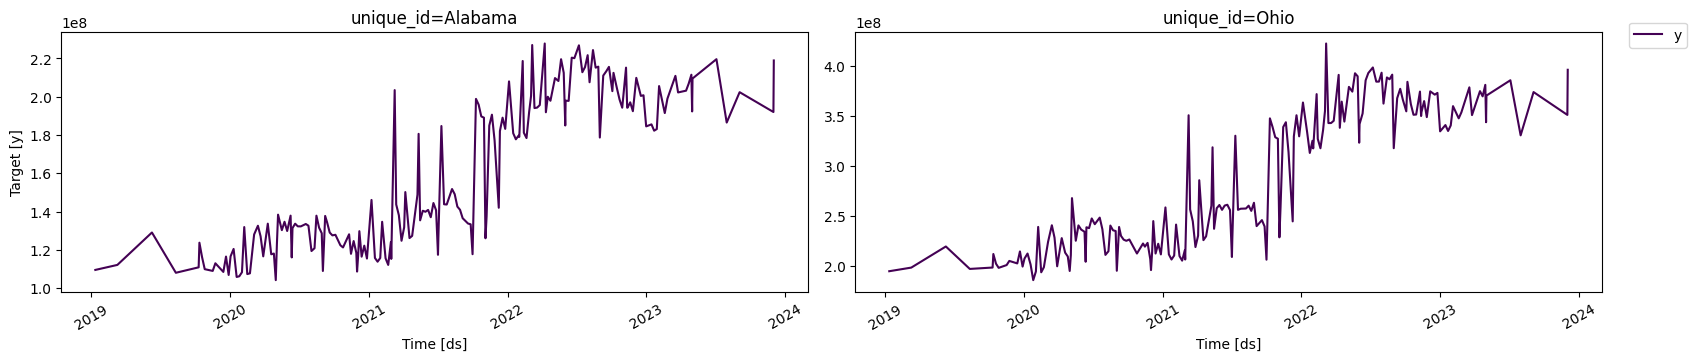

In [137]:
plot_series(df=df, ids=["Alabama", "Ohio"], palette="viridis")

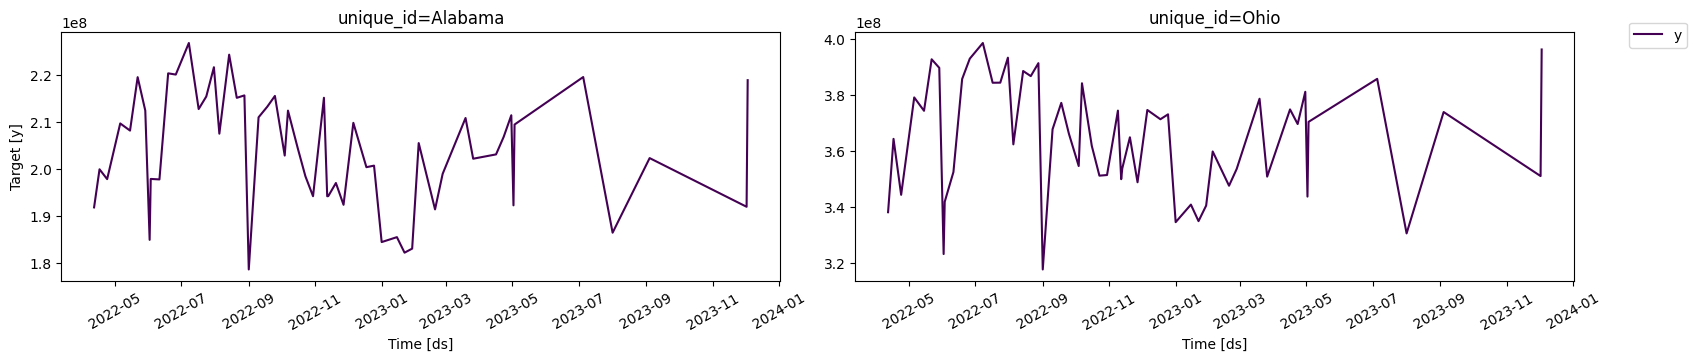

In [138]:
plot_series(df=df, ids=["Alabama", "Ohio"],max_insample_length=56, palette="viridis")


In [173]:
df

,unique_id,ds,y
0,Alabama,2019-01-12,109574036.0
1,Alabama,2019-03-11,112189103.8
2,Alabama,2019-06-10,129106730.4
3,Alabama,2019-08-12,108083723.8
4,Alabama,2019-10-11,110932912.8
...,...,...,...
7966,Wyoming,2023-07-05,23276821.3
7967,Wyoming,2023-08-01,19531016.1
7968,Wyoming,2023-09-04,21188735.7
7969,Wyoming,2023-12-02,20510613.7


#BASELINE MODEL


In [139]:
from statsforecast import StatsForecast
from statsforecast.models import Naive, HistoricAverage, WindowAverage, SeasonalNaive

Weekly data with missing weeks

NOT daily
NOT monthly
NOT irregular random
BUT weekly with gaps

In [140]:
def make_weekly_regular(df):
    
    df = df.copy()

    df["ds"] = pd.to_datetime(df["ds"])
    df = df.sort_values(["unique_id", "ds"])

    result = []

    for uid, g in df.groupby("unique_id"):

        g = g.set_index("ds")

        # create weekly grid and fill missing
        g = (
            g["y"]
            .resample("W")
            .asfreq()
            .fillna(0)
            .to_frame()
        )

        g["unique_id"] = uid

        result.append(g.reset_index())

    return pd.concat(result, ignore_index=True)


weekly_df = make_weekly_regular(df)


In [141]:
ohio = weekly_df[weekly_df['unique_id'] == "Ohio"]

In [142]:
ohio.head(300)

,ds,y,unique_id
6912,2019-01-13,0.0,Ohio
6913,2019-01-20,0.0,Ohio
6914,2019-01-27,0.0,Ohio
6915,2019-02-03,0.0,Ohio
6916,2019-02-10,0.0,Ohio
...,...,...,...
7163,2023-11-05,0.0,Ohio
7164,2023-11-12,0.0,Ohio
7165,2023-11-19,0.0,Ohio
7166,2023-11-26,0.0,Ohio


In [143]:
Alabama = weekly_df[weekly_df['unique_id'] == "Alabama"]

In [144]:
Alabama.head(256)

,ds,y,unique_id
0,2019-01-13,0.0,Alabama
1,2019-01-20,0.0,Alabama
2,2019-01-27,0.0,Alabama
3,2019-02-03,0.0,Alabama
4,2019-02-10,0.0,Alabama
...,...,...,...
251,2023-11-05,0.0,Alabama
252,2023-11-12,0.0,Alabama
253,2023-11-19,0.0,Alabama
254,2023-11-26,0.0,Alabama


In [168]:
horizon = 8

cutoff = weekly_df["ds"].max() - pd.Timedelta(weeks=horizon)

train = df[df["ds"] <= cutoff]
test  = df[df["ds"] > cutoff]

In [146]:
models = [
    Naive(),
    HistoricAverage(),
    WindowAverage(window_size=4),     # last 4 weeks avg
    SeasonalNaive(season_length=52)   # yearly weekly seasonality
]


In [147]:
sf = StatsForecast(
    models=models,
    freq="W",
    n_jobs=-1
)

In [148]:
sf.fit(train)

preds = sf.predict(h=horizon)

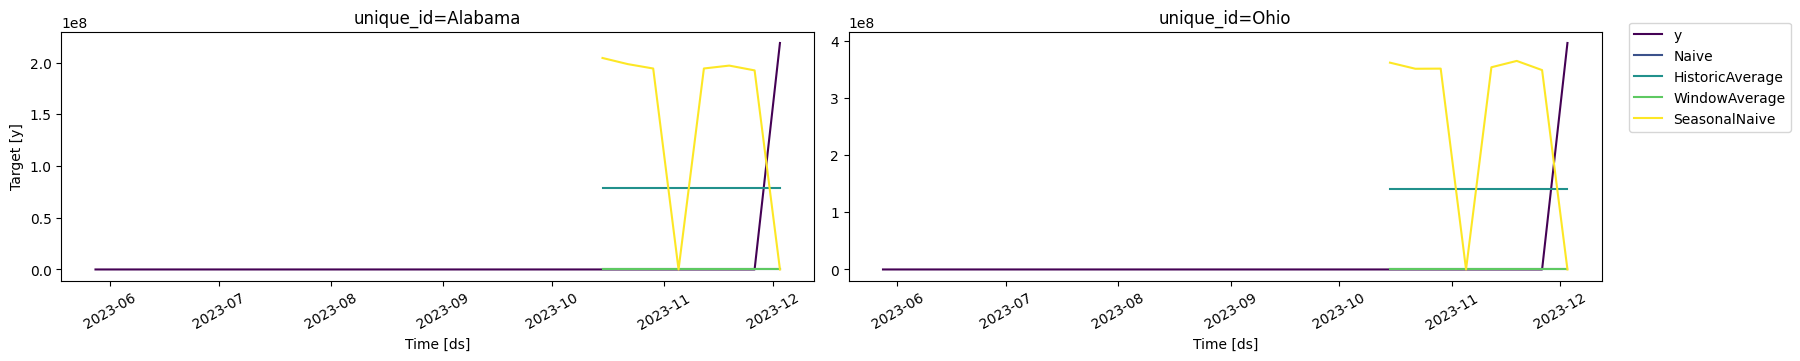

In [149]:
plot_series(
    df=weekly_df, 
    forecasts_df=preds, 
    ids=["Alabama", "Ohio"], 
    max_insample_length=28, 
    palette="viridis")

In [150]:
eval_df = test.merge(preds, on=["unique_id", "ds"], how="left")

evaluation = evaluate(eval_df, metrics=[mae])
evaluation.head()

,unique_id,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,Alabama,mae,2.736319e+07,8.658888e+07,2.736319e+07,1.749739e+08
1,Arizona,mae,2.948661e+07,9.084398e+07,2.948661e+07,1.841164e+08
2,Arkansas,mae,1.451521e+07,4.575271e+07,1.451521e+07,9.332042e+07
3,California,mae,1.152231e+08,3.609235e+08,1.152231e+08,7.304080e+08
4,Colorado,mae,2.340935e+07,7.347760e+07,2.340935e+07,1.464044e+08


In [151]:
evaluation = evaluation.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()
evaluation

,metric,Naive,HistoricAverage,WindowAverage,SeasonalNaive
0,mae,2.899802e+07,9.084471e+07,2.899802e+07,1.839978e+08


#Using zero for missing weeks will result in wrong output

So Use of Linear InterPolation


In [152]:
df.head(30)

,unique_id,ds,y
0,Alabama,2019-01-12,109574036.0
1,Alabama,2019-03-11,112189103.8
2,Alabama,2019-06-10,129106730.4
3,Alabama,2019-08-12,108083723.8
4,Alabama,2019-10-11,110932912.8
79,Alabama,2019-10-13,123782285.8
122,Alabama,2019-10-20,116218908.9
165,Alabama,2019-10-27,109968010.6
104,Alabama,2019-11-17,109056410.0
147,Alabama,2019-11-24,113040422.1


In [153]:
weekly_df = (
    df
    .set_index("ds")
    .groupby("unique_id")["y"]
    .resample("W-SAT")   # align week
    .asfreq()
    .ffill()             # forward fill
    .bfill()             # fill start if needed
    .reset_index()
)


In [154]:
weekly_df.head(256)

,unique_id,ds,y
0,Alabama,2019-01-12,109574036.0
1,Alabama,2019-01-19,109574036.0
2,Alabama,2019-01-26,109574036.0
3,Alabama,2019-02-02,109574036.0
4,Alabama,2019-02-09,109574036.0
...,...,...,...
251,Alabama,2023-11-04,205535418.6
252,Alabama,2023-11-11,205535418.6
253,Alabama,2023-11-18,205535418.6
254,Alabama,2023-11-25,205535418.6


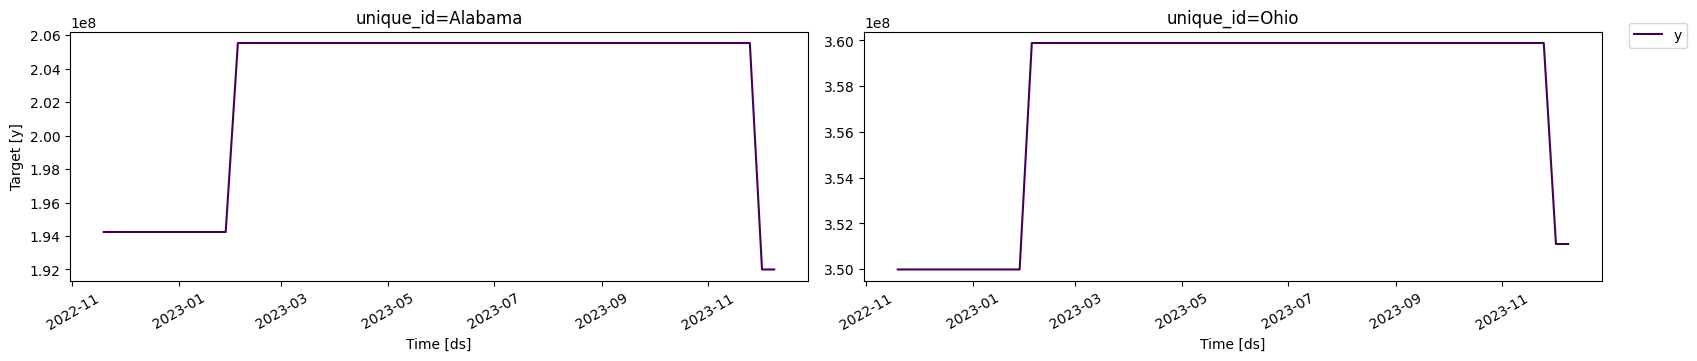

In [155]:
plot_series(df=weekly_df, ids=["Alabama", "Ohio"],max_insample_length=56, palette="viridis")

In [156]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA
from utilsforecast.evaluation import evaluate
from utilsforecast.losses import mae

In [169]:
horizon = 8

cutoff = df["ds"].max() - pd.Timedelta(weeks=horizon)

train = df[df["ds"] <= cutoff]
test  = df[df["ds"] > cutoff]

In [170]:
models = [   
    AutoARIMA(season_length=1, alias='AutoARIMA_Daily'),
    AutoARIMA(season_length=52, alias='AutoARIMA_Weekly')
]

In [171]:
sf = StatsForecast(
    models=models,
    freq="W-SAT",
    n_jobs=-1
)


In [172]:
sf.fit(train)

preds = sf.predict(h=horizon)

In [174]:
eval_df = test.merge(preds, on=["unique_id", "ds"], how="left")

evaluation2 = evaluate(eval_df, metrics=[mae])

print("\nARIMA MAE per state:\n")
print(evaluation2)


ARIMA MAE per state:

         unique_id metric  AutoARIMA_Daily  AutoARIMA_Weekly
0          Alabama    mae              NaN               NaN
1          Arizona    mae              NaN               NaN
2         Arkansas    mae              NaN               NaN
3       California    mae              NaN               NaN
4         Colorado    mae              NaN               NaN
5      Connecticut    mae              NaN               NaN
6          Florida    mae              NaN               NaN
7          Georgia    mae              NaN               NaN
8         Illinois    mae              NaN               NaN
9          Indiana    mae              NaN               NaN
10            Iowa    mae              NaN               NaN
11          Kansas    mae              NaN               NaN
12        Kentucky    mae              NaN               NaN
13       Louisiana    mae              NaN               NaN
14           Maine    mae              NaN               NaN
1

In [167]:
evaluation2 = evaluation2.drop(['unique_id'], axis=1).groupby('metric').mean().reset_index()
evaluation2

,metric,AutoARIMA_Daily,AutoARIMA_Weekly
0,mae,2.156552e+06,2.156552e+06
